In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("Data/global_power_plant_database_v_1_3/global_power_plant_database.csv",low_memory=False)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [43]:
#  fuel dataframe
df = df[['primary_fuel', 'capacity_mw']]
df.rename(columns={'primary_fuel': 'FUEL', 'capacity in MW': 'CAPACITY'}, inplace=True)
df

,FUEL,capacity_mw
0,Hydro,33.0
1,Solar,10.0
2,Solar,10.0
3,Hydro,66.0
4,Hydro,100.0
...,...,...
34931,Oil,50.0
34932,Oil,20.0
34933,Hydro,108.0
34934,Coal,920.0


In [44]:
df = df.groupby(df['FUEL']).sum()
df['CAPACITY'] = df['capacity_mw']/1000
df = df[df['CAPACITY'] > 30].reset_index()

global_capacity = df['CAPACITY'].sum()
print('dataframe:\n{}\n\nglobal_capacity: {:,.2f} GW'.format(df,global_capacity))

dataframe:
      FUEL   capacity_mw     CAPACITY
0  Biomass  3.428130e+04    34.281302
1     Coal  1.965541e+06  1965.541000
2      Gas  1.493051e+06  1493.050602
3    Hydro  1.053160e+06  1053.159620
4  Nuclear  4.079118e+05   407.911760
5      Oil  2.618787e+05   261.878710
6    Solar  1.883123e+05   188.312323
7     Wind  2.630537e+05   263.053730

global_capacity: 5,667.19 GW


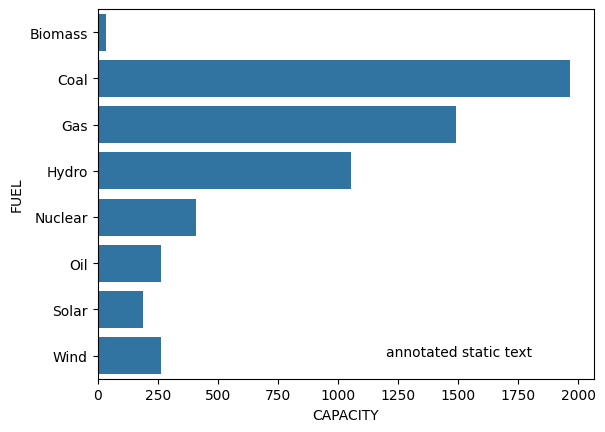

In [45]:
# annotate static text on a barplot (example)
sns.barplot(data = df, x = 'CAPACITY', y = 'FUEL')
plt.text(1200, 7, "annotated static text") 
plt.show()

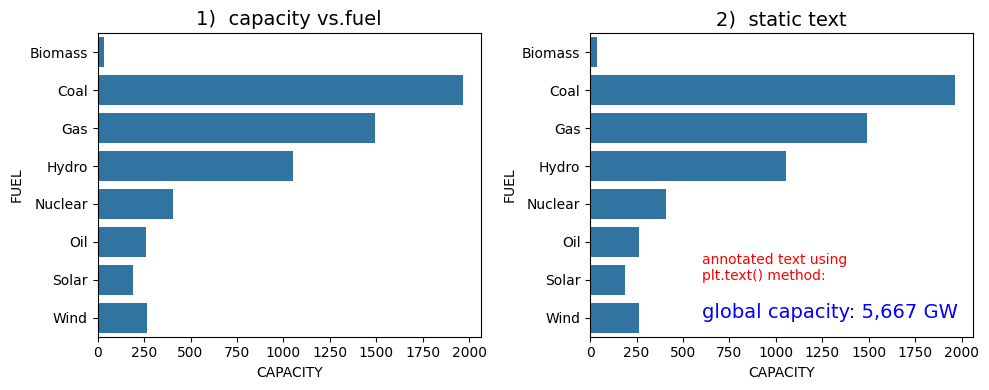

In [46]:
plt.figure(figsize=(10,4))

#  1)  plot of capacity vs.fuel (no text)
plt.subplot(121)
ax = sns.barplot(data = df, x = 'CAPACITY', y = 'FUEL')
plt.title('1)  capacity vs.fuel', fontsize = 14)


#  2)  annotate - static text 
plt.subplot(122)
sns.barplot(data = df, x = 'CAPACITY', y = 'FUEL')
plt.title('2)  static text', fontsize = 14)


#  annotate text:  static
plt.text(600, 6, "annotated text using\nplt.text() method:", fontsize = 10, color = 'r')
plt.text(600, 7, "global capacity: {:,.0f} GW".format(global_capacity), fontsize = 14, color = 'b')
    
plt.tight_layout()
plt.show()

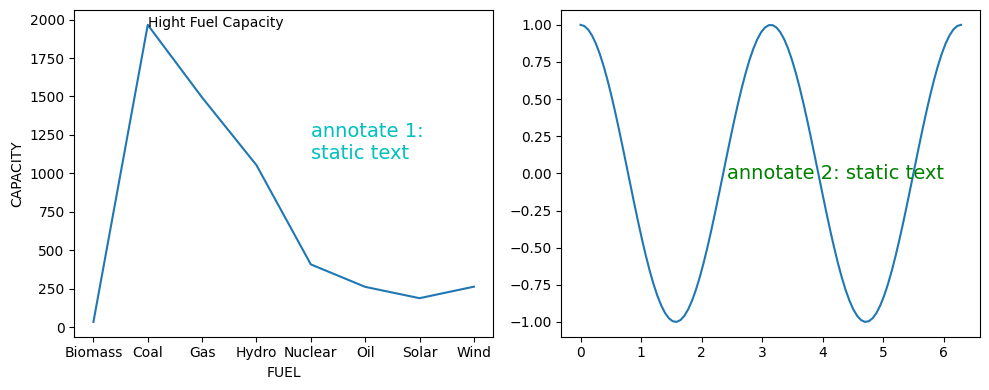

In [51]:
#  create x,y values for plotting
x = np.linspace(0,2*np.pi, 100)
y = np.cos(2*x)


plt.figure(figsize=(10,4))

plt.subplot(121)
sns.lineplot(data = df, x = 'FUEL', y = 'CAPACITY')
plt.text(4, 1200, "annotate 1:\nstatic text", fontsize = 14, color = 'c', ha = 'left', va = 'center')
plt.text(1,1950,"Hight Fuel Capacity")

plt.subplot(122)
plt.plot(x,y)
plt.text(6, 0, "annotate 2: static text", fontsize = 14, color = 'g', ha = 'right', va = 'center')

plt.tight_layout()
plt.show()

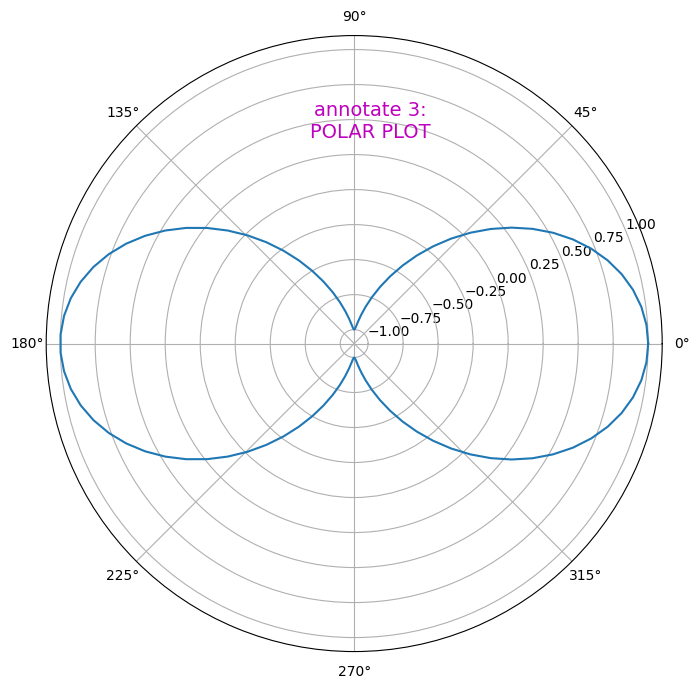

In [53]:
plt.figure(figsize=(15,8))
plt.polar(x, y)
plt.text(1.5, 0.5, "annotate 3:\nPOLAR PLOT", fontsize = 14, color = 'm', ha = 'center', va = 'center')
plt.show()

0    x: Biomass    y:      34.281302
1    x: Coal       y:   1,965.541000
2    x: Gas        y:   1,493.050602
3    x: Hydro      y:   1,053.159620
4    x: Nuclear    y:     407.911760
5    x: Oil        y:     261.878710
6    x: Solar      y:     188.312323
7    x: Wind       y:     263.053730


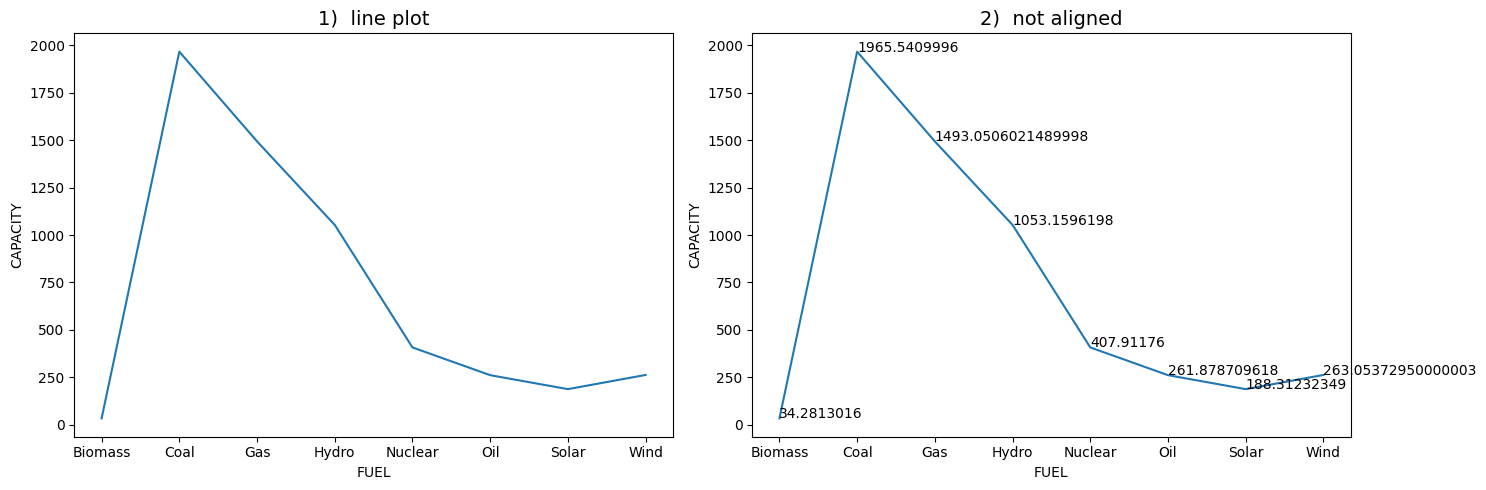

In [55]:
plt.figure(figsize=(15,5))

#  1)  basic lineplot
plt.subplot(121)
sns.lineplot(data = df, x = 'FUEL', y = 'CAPACITY')
plt.title('1)  line plot', fontsize = 14)


#  2)  annotated text - not aligned
plt.subplot(122)
sns.lineplot(data = df, x = 'FUEL', y = 'CAPACITY')
plt.title('2)  not aligned', fontsize = 14)

#  annotate text - dynamic
for row, x in enumerate(df['FUEL']):
    y = df['CAPACITY'].loc[row]
    plt.text(x, y, y)
    
    # print out row, x and y values:
    print('{:<4} x: {:<10} y: {:>14,f}'.format(row,x,y))


plt.tight_layout()
plt.show()

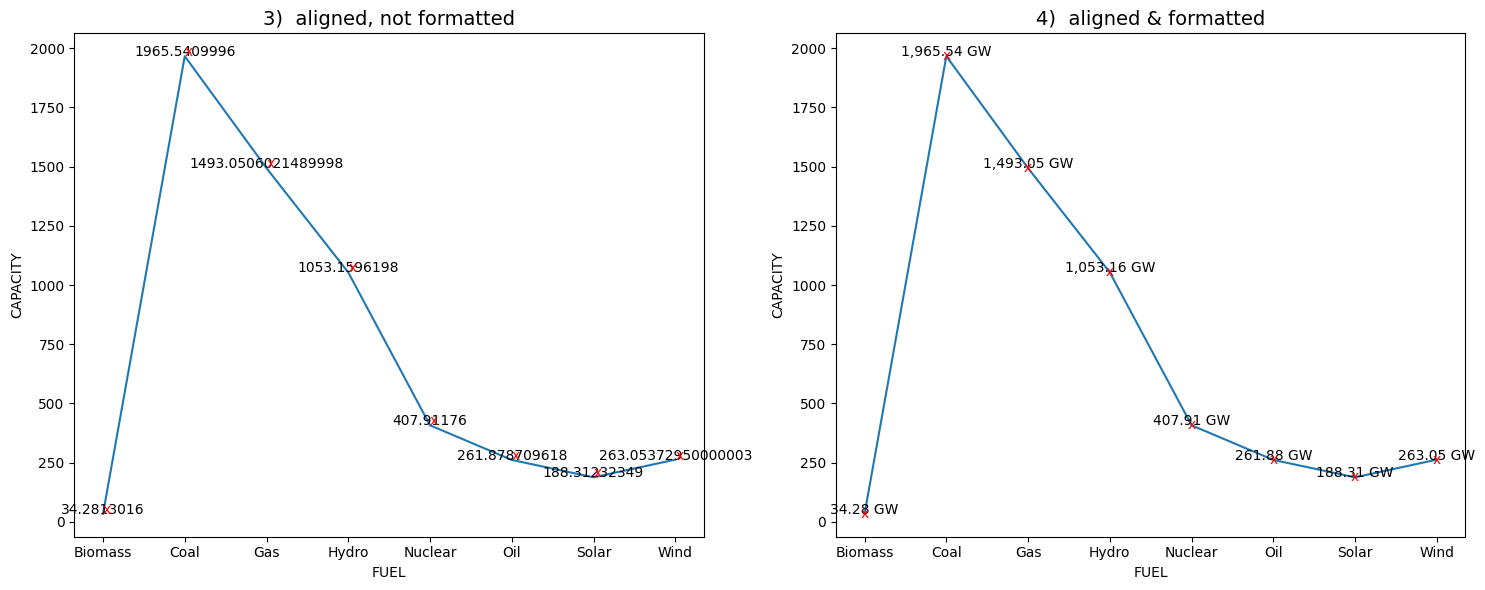

In [57]:
plt.figure(figsize=(15,6))

#  3)  annotated text - aligned, not formatted
plt.subplot(121)
sns.lineplot(data = df, x = 'FUEL', y = 'CAPACITY')
plt.title('3)  aligned, not formatted', fontsize = 14)

#  annotate text - dynamic
for row, x in enumerate(df['FUEL']):
    y = df['CAPACITY'].loc[row]
    plt.text(x, y, y, ha = 'center')
    plt.text(x, y, 'x', color = 'r')


#  4)  annotated text - aligned & formatted
plt.subplot(122)
sns.lineplot(data = df, x = 'FUEL', y = 'CAPACITY')
plt.title('4)  aligned & formatted', fontsize = 14)

#  annotate text - dynamic
for row, x in enumerate(df['FUEL']):
    y = df['CAPACITY'].loc[row]
    plt.text(x, y, '{:,.2f} GW'.format(y), ha = 'center')
    plt.text(x, y, 'x', color = 'r', ha = 'center', va = 'center')


plt.tight_layout()
plt.show()

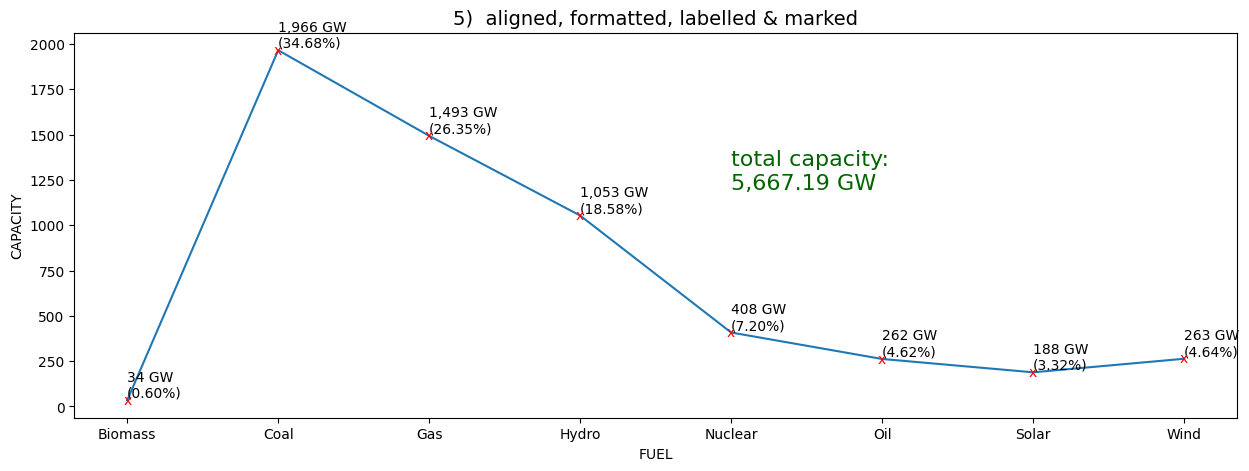

In [59]:
plt.figure(figsize=(15,5))

#  5)  annotated text - aligned, formatted, labelled & marked
sns.lineplot(data = df, x = 'FUEL', y = 'CAPACITY')
plt.title('5)  aligned, formatted, labelled & marked', fontsize = 14)

#  annotate text - static
plt.text(4, 1200, "total capacity:\n{:,.2f} GW".format(df['CAPACITY'].sum()), color = 'darkgreen', fontsize = 16)

#  annotate text - dynamic
for row, x in enumerate(df['FUEL']):
    y = df['CAPACITY'].loc[row]
    plt.text(x, y, '{:0,.0f} GW\n({:,.2f}%)'.format(y, y * 100/global_capacity), ha = 'left', va = 'bottom')
    plt.text(x, y, 'x', color = 'r', ha = 'center', va = 'center')

plt.show()

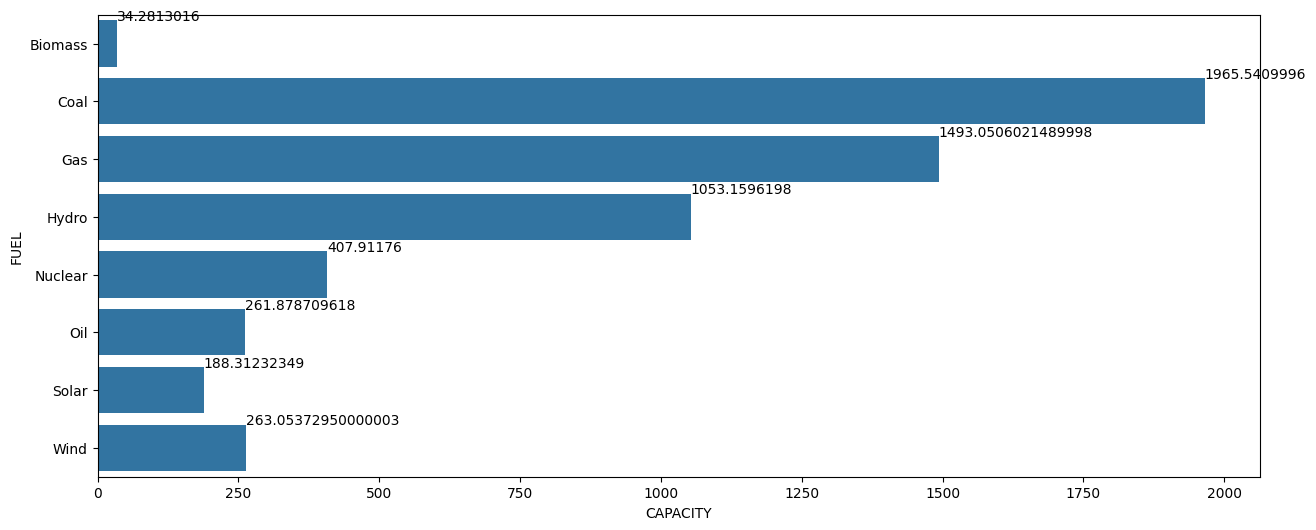

In [61]:
# annotate numbers on a horizontal barplot (example)
plt.figure(figsize=(15,6))
ax = sns.barplot(data = df, x = 'CAPACITY', y='FUEL')
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

p.get_x(): 0	p.get_y(): -0.4		p.get_width(): 34.28	 p.get_height(): 0.8
p.get_x(): 0	p.get_y(): 0.6		p.get_width(): 1,965.54	 p.get_height(): 0.7999999999999999
p.get_x(): 0	p.get_y(): 1.6		p.get_width(): 1,493.05	 p.get_height(): 0.7999999999999998
p.get_x(): 0	p.get_y(): 2.6		p.get_width(): 1,053.16	 p.get_height(): 0.7999999999999998
p.get_x(): 0	p.get_y(): 3.6		p.get_width(): 407.91	 p.get_height(): 0.8000000000000003
p.get_x(): 0	p.get_y(): 4.6		p.get_width(): 261.88	 p.get_height(): 0.8000000000000007
p.get_x(): 0	p.get_y(): 5.6		p.get_width(): 188.31	 p.get_height(): 0.8000000000000007
p.get_x(): 0	p.get_y(): 6.6		p.get_width(): 263.05	 p.get_height(): 0.8000000000000007


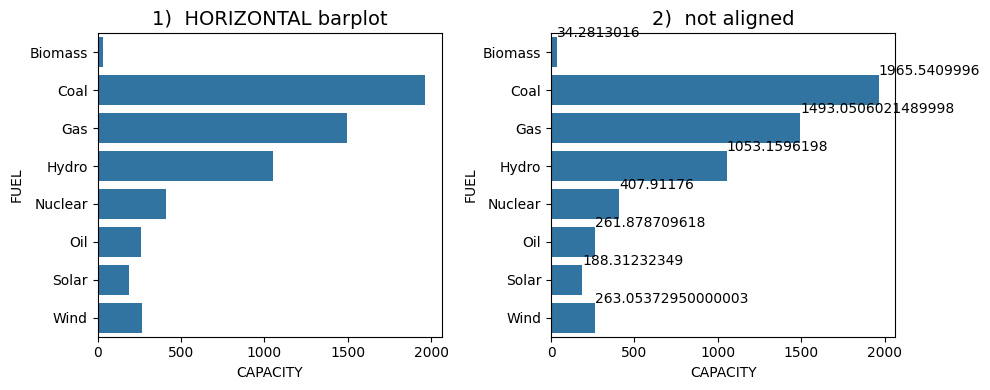

In [62]:
plt.figure(figsize=(10,4))

#  1)  basic barchart - horizontal
plt.subplot(121)
sns.barplot(data = df, x = 'CAPACITY', y = 'FUEL')
plt.title('1)  HORIZONTAL barplot', fontsize = 14)


#  2)  annotated barplot - not aligned
plt.subplot(122)
ax = sns.barplot(data = df, x = 'CAPACITY', y = 'FUEL')
plt.title('2)  not aligned', fontsize = 14)

#  annotate numbers
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
    
    # print out px.annotate GET values:
    print('p.get_x(): {}\tp.get_y(): {}\t\tp.get_width(): {:,.2f}\t p.get_height(): {}'.format(p.get_x(), p.get_y(), p.get_width(), p.get_height()))


plt.tight_layout()
plt.show()


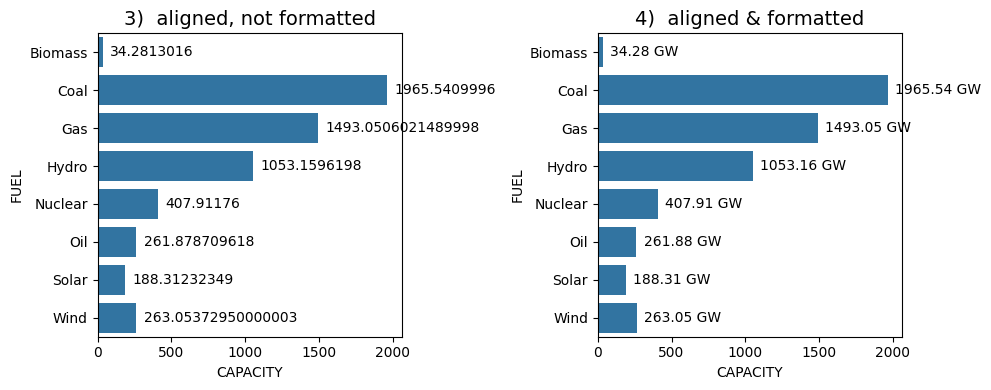

In [63]:
plt.figure(figsize=(10,4))

#  3)  annotated barplot - aligned, not formatted
plt.subplot(121)
ax = sns.barplot(data = df, x = 'CAPACITY', y = 'FUEL')
plt.title('3)  aligned, not formatted', fontsize = 14)

#  annotate numbers
for p in ax.patches:
    ax.annotate("{}".format(p.get_width()), (p.get_x() + p.get_width() + 50, p.get_y() + .4), ha = 'left', va = 'center')


#  4)  annotated barplot - aligned & formatted
plt.subplot(122)
ax = sns.barplot(data = df, x = 'CAPACITY', y = 'FUEL')
plt.title('4)  aligned & formatted', fontsize = 14)

#  annotate numbers
for p in ax.patches:
    ax.annotate("{:.2f} GW".format(p.get_width()), (p.get_x() + p.get_width() + 50, p.get_y() + .4), ha = 'left', va = 'center')


plt.tight_layout()
plt.show()

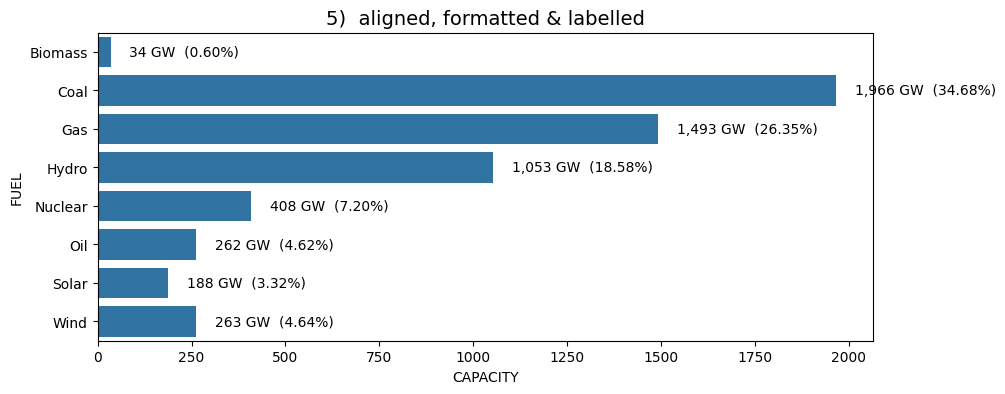

In [64]:
plt.figure(figsize=(10,4))

#  5)  annotated barplot - annotate, aligned, formatted and labelled
ax = sns.barplot(data = df, x = 'CAPACITY', y = 'FUEL')
plt.title('5)  aligned, formatted & labelled', fontsize = 14)

#  annotate numbers
for p in ax.patches:
    ax.annotate("{:0,.0f} GW  ({:,.2f}%)".format(p.get_width(), p.get_width()*100/global_capacity), (p.get_x() + p.get_width() + 50, p.get_y() + .4), ha = 'left', va = 'center')

plt.show()

In [39]:
max_fuel_produce = pd.DataFrame(df.FUEL.value_counts().reset_index())
max_fuel_produce.head(2)

,index,FUEL
0,Solar,10665
1,Hydro,7156


In [26]:
max_fuel_produce.columns = {'index':'Fuel_type','FUEL':'Fuel'}
max_fuel_produce

,index,FUEL
0,Solar,10665
1,Hydro,7156
2,Wind,5344
3,Gas,3998
4,Coal,2330
5,Oil,2320
6,Biomass,1430
7,Waste,1068
8,Nuclear,195
9,Geothermal,189


<BarContainer object of 15 artists>

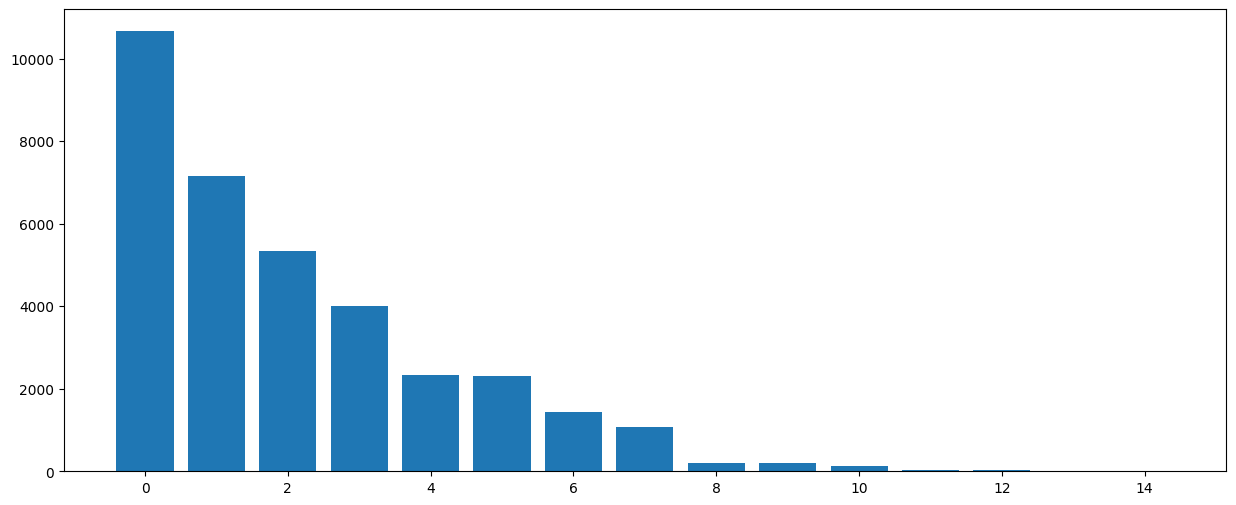

In [28]:
plt.figure(figsize=(15,6))
plt.bar(max_fuel_produce.index,max_fuel_produce.FUEL)